# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from pathlib import Path
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder


plt.style.use('ggplot')

# Performing EDA: Exploratory Data Analysis

In [2]:
#data = pd.read_excel("C:/Users/VanshitaS/Desktop/Apziva Projects/Term Deposit Marketing/term-deposit-marketing-2020.xlsx")
#print(data)
cur_dir = Path().resolve()
print(cur_dir)
path_to_file = Path.joinpath(cur_dir, 'term-deposit-marketing-2020.xlsx')
join_path = cur_dir / 'term-deposit-marketing-2020.xlsx'
print("the joined path =", join_path)

/Users/VanshitaS/Desktop/Apziva Projects/Term Deposit Marketing
the joined path = /Users/VanshitaS/Desktop/Apziva Projects/Term Deposit Marketing/term-deposit-marketing-2020.xlsx


In [3]:
data = pd.read_excel(path_to_file)
# print(data)
print(data)
data.head()

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
39995   53    technician   married   tertiary      no      395      no   no   
39996   30    management    single   tertiary      no     3340      no   no   
39997   54         admin  divorced  secondary      no      200      no   no   
39998   34    management   married   tertiary      no     1047      no   no   
39999   38    technician   married  secondary      no     1442     yes   no   

        contact  day month  duration  campaign    y

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [4]:
data.describe() # the stats of the data, mean, mediun, max and min, and std value of the data

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [5]:
data["y"].value_counts() # balance this before training the model

no     37104
yes     2896
Name: y, dtype: int64

In [6]:
data.shape # checking the shape of the data

(40000, 14)

In [7]:
data['age'].value_counts()

32    1909
31    1826
33    1770
34    1730
35    1721
      ... 
90       1
94       1
86       1
95       1
81       1
Name: age, Length: 70, dtype: int64

### Performing One-hot encoder and Ordinal Encoder: Combing all Data into Orignal Dataset

In [8]:
one_hot_cols = ['loan', 'housing', 'marital', 'month', 'contact', 'default']
ordinal_col = ['job','education']

# Encode ranked data with Ordinal Encoder
ordinal_encoder = OrdinalEncoder()
oe_df = pd.DataFrame(ordinal_encoder.fit_transform(data[ordinal_col]), columns=ordinal_col)

original_categories = ordinal_encoder.categories_[0]
data[ordinal_col] = original_categories[oe_df.astype(int)]

# Encode the one hot columns using OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_data = one_hot_encoder.fit_transform(data[one_hot_cols])

# Convert the one hot encoded data to a DataFrame and add column names
one_hot_col_names = one_hot_encoder.get_feature_names_out(one_hot_cols)
one_hot_data = pd.DataFrame(one_hot_data, columns=one_hot_col_names)

# Combine the ordinal encoded data with the one hot encoded data
ordinal_data = pd.DataFrame(data, columns=[f'{ordinal_col}_encoded'])
final_data = pd.concat([oe_df, one_hot_data], axis=1)

# Save the final dataset to a xlsx file
print(final_data.to_excel('final_data.xlsx', index=False))

None


### Merging two Datasets

In [9]:
# Reading new data
cur_dir = Path().resolve()
print(cur_dir)
path_to_file = Path.joinpath(cur_dir, 'final_data.xlsx')
join_path = cur_dir / 'final_data.xlsx'
print("the joined path =", join_path)

# New data
new_data = pd.read_excel(path_to_file)
# print(data)
new_data.head()

/Users/VanshitaS/Desktop/Apziva Projects/Term Deposit Marketing
the joined path = /Users/VanshitaS/Desktop/Apziva Projects/Term Deposit Marketing/final_data.xlsx


,job,education,loan_no,loan_yes,housing_no,housing_yes,marital_divorced,marital_married,marital_single,month_apr,...,month_jun,month_mar,month_may,month_nov,month_oct,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes
0,4,2,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
1,9,1,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
2,2,1,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
3,1,3,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
4,11,3,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0


In [10]:
# pandas merge: merging the columns, remove non-encoded columns in old dataset 
dataset_term_deposit = pd.merge(data, new_data, left_index=True, right_index=True) # merging on the same index
print(dataset_term_deposit.to_excel('dataset_term_deposit.xlsx', index=False))
# practicing on pandas tutorial for working with dataset  

None


In [11]:
# Reading new data
cur_dir = Path().resolve()
print(cur_dir)
path_to_file = Path.joinpath(cur_dir, 'dataset_term_deposit.xlsx')
join_path = cur_dir / 'dataset_term_deposit.xlsx'
print("the joined path =", join_path)

# New data
pd.read_excel(path_to_file)
# print(data)

/Users/VanshitaS/Desktop/Apziva Projects/Term Deposit Marketing
the joined path = /Users/VanshitaS/Desktop/Apziva Projects/Term Deposit Marketing/dataset_term_deposit.xlsx


,age,job_x,marital,education_x,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes
0,58,management,married,entrepreneur,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,1,1,0
1,44,technician,single,blue-collar,no,29,yes,no,unknown,5,...,0,0,1,0,0,0,0,1,1,0
2,33,entrepreneur,married,blue-collar,no,2,yes,yes,unknown,5,...,0,0,1,0,0,0,0,1,1,0
3,47,blue-collar,married,housemaid,no,1506,yes,no,unknown,5,...,0,0,1,0,0,0,0,1,1,0
4,33,unknown,single,housemaid,no,1,no,no,unknown,5,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,entrepreneur,no,395,no,no,cellular,3,...,1,0,0,0,0,1,0,0,1,0
39996,30,management,single,entrepreneur,no,3340,no,no,cellular,3,...,1,0,0,0,0,1,0,0,1,0
39997,54,admin,divorced,blue-collar,no,200,no,no,cellular,3,...,1,0,0,0,0,1,0,0,1,0
39998,34,management,married,entrepreneur,no,1047,no,no,cellular,3,...,1,0,0,0,0,1,0,0,1,0


In [12]:
# Drop the specified columns from the DataFrame
columns_to_drop = ['job_x', 'education_x', 'loan', 'housing', 'month', 'marital', 'contact', 'default']
FinalDataset_term_deposit = dataset_term_deposit.drop(columns_to_drop, axis=1)

# Write the modified DataFrame to a new Exel file
print(FinalDataset_term_deposit.to_excel('FinalDataset_term_deposit.xlsx', index=False))

# read new dataset
new_data = pd.read_excel("FinalDataset_term_deposit.xlsx")
print(new_data)

None
       age  balance  day  duration  campaign    y  job_y  education_y  \
0       58     2143    5       261         1   no      4            2   
1       44       29    5       151         1   no      9            1   
2       33        2    5        76         1   no      2            1   
3       47     1506    5        92         1   no      1            3   
4       33        1    5       198         1   no     11            3   
...    ...      ...  ...       ...       ...  ...    ...          ...   
39995   53      395    3       107         1   no      9            2   
39996   30     3340    3       238         3  yes      4            2   
39997   54      200    3       170         1  yes      0            1   
39998   34     1047    3       342         1   no      4            2   
39999   38     1442    3       113         1   no      9            1   

       loan_no  loan_yes  ...  month_jun  month_mar  month_may  month_nov  \
0            1         0  ...          0 

# Relationship Analysis

In [13]:
corr = FinalDataset_term_deposit.corr()
corr  # we are seeing the relation between variables

,age,balance,day,duration,campaign,job_y,education_y,loan_no,loan_yes,housing_no,...,month_jun,month_mar,month_may,month_nov,month_oct,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes
age,1.000000,0.081517,-0.011689,-0.036270,0.016204,-0.019719,-0.091083,-0.000041,0.000041,0.179606,...,0.085656,0.004259,-0.129909,0.038068,0.002637,-0.068206,0.120689,0.010386,0.014857,-0.014857
balance,0.081517,1.000000,0.011662,0.014072,-0.008137,0.015187,0.066592,0.080596,-0.080596,0.049946,...,0.037525,0.017201,-0.061806,0.138829,0.026811,0.004086,0.029116,-0.018851,0.070069,-0.070069
day,-0.011689,0.011662,1.000000,-0.032983,0.165429,0.028441,0.036206,-0.005838,0.005838,0.050622,...,-0.211740,-0.013673,-0.046278,0.113071,0.041480,0.034320,0.037242,-0.054363,-0.006287,0.006287
duration,-0.036270,0.014072,-0.032983,1.000000,-0.088387,-0.002445,0.001828,0.003952,-0.003952,-0.022455,...,-0.021173,-0.010308,0.014137,-0.004876,0.011327,0.017624,-0.040379,0.001928,0.008597,-0.008597
campaign,0.016204,-0.008137,0.165429,-0.088387,1.000000,0.013914,0.016562,-0.000582,0.000582,0.054823,...,0.045657,-0.008928,-0.093437,-0.093154,-0.026013,-0.017733,0.061620,-0.012468,-0.012135,0.012135
job_y,-0.019719,0.015187,0.028441,-0.002445,0.013914,1.000000,0.174336,0.024220,-0.024220,0.114148,...,-0.023691,0.009713,-0.097873,0.011834,-0.006679,0.076570,-0.010673,-0.074262,0.004977,-0.004977
education_y,-0.091083,0.066592,0.036206,0.001828,0.016562,0.174336,1.000000,0.043702,-0.043702,0.083699,...,-0.040340,0.033019,-0.077711,0.048257,0.011321,0.100671,-0.038798,-0.085215,0.006647,-0.006647
loan_no,-0.000041,0.080596,-0.005838,0.003952,-0.000582,0.024220,0.043702,1.000000,-1.000000,0.004266,...,0.027232,0.022856,0.050599,-0.020236,-0.000207,-0.029800,0.001727,0.030119,0.075006,-0.075006
loan_yes,0.000041,-0.080596,0.005838,-0.003952,0.000582,-0.024220,-0.043702,-1.000000,1.000000,-0.004266,...,-0.027232,-0.022856,-0.050599,0.020236,0.000207,0.029800,-0.001727,-0.030119,-0.075006,0.075006
housing_no,0.179606,0.049946,0.050622,-0.022455,0.054823,0.114148,0.083699,0.004266,-0.004266,1.000000,...,0.118060,0.055478,-0.420169,0.005101,0.005784,0.141946,0.059696,-0.177530,-0.019229,0.019229


<AxesSubplot:>

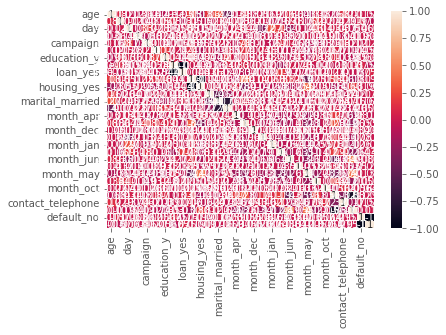

In [14]:
sns.heatmap(corr, annot=True)

# Splitting Dataset into Training and Testing

To perform oversampling on an unbalanced dataset and then split it into training and testing sets, you can use the following steps:

- Load the unbalanced dataset from a file into a pandas DataFrame.

- Separate the input features (X) and target variable (y) from the DataFrame.

- Split the data into training and testing sets using train_test_split() from the scikit-learn library.

- Use the RandomOverSampler() from the imblearn library to oversample the minority class in the training set.

- Fit and transform the oversampled data using the fit_resample() method of the RandomOverSampler() object.

- Combine the oversampled X and y arrays back into a single DataFrame.

- Shuffle the rows of the oversampled DataFrame to remove any potential order effects.

- Split the oversampled data into training and testing sets using train_test_split() from the scikit-learn library.

In [32]:
# Resample the minority class. You can change the strategy to 'auto' if you are not sure.

X = FinalDataset_term_deposit.drop(['y'], axis=1)
y = FinalDataset_term_deposit['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

minority_class = y_train.value_counts().idxmin()
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_resample(X_train, y_train)
oversampled_df = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)

# Shuffle the rows of the oversampled DataFrame to remove any potential order effects
oversampled_df = oversampled_df.sample(frac=1, random_state=42).reset_index(drop=True) 
# oversampled_train.columns = normalized_df.columns

yes


<AxesSubplot:ylabel='y'>

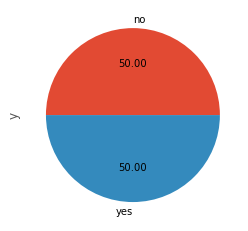

In [36]:
oversampled_df["y"].value_counts().plot.pie(autopct = '%.2f')

In [35]:
# Split the oversampled data into training and testing sets
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(oversampled_df.drop('y', axis=1), oversampled_df['y'], test_size=0.3, random_state=42)

# Performing Random Forest 

In the previous step we make sure to set the test_size parameter to a value that is appropriate for our dataset. This parameter controls the size of the testing set as a fraction of the total dataset. A common value for test_size is 0.3, which means that 30% of the data is reserved for testing. When this is esablished, we have continues into the splitting of test and training data. When performing random forest classifier below we can see and evaluate the accuracy rate of the model. 

In [37]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_oversampled, y_train_oversampled)
y_pred = rf.predict(X_test_oversampled)

# Print the classification report
print(classification_report(y_test_oversampled, y_pred))
print('Dev set accuracy: {:.3f}'.format(accuracy_score(y_test_oversampled,y_pred)))

# Accuracy score of 97% 

              precision    recall  f1-score   support

          no       0.96      0.98      0.97      7771
         yes       0.98      0.96      0.97      7815

    accuracy                           0.97     15586
   macro avg       0.97      0.97      0.97     15586
weighted avg       0.97      0.97      0.97     15586

Dev set accuracy: 0.970


After performing oversampling and splitting the data into training and testing sets, you can use the X_train_oversampled, y_train_oversampled, X_test_oversampled, and y_test_oversampled arrays to train and test your machine learning model on the balanced data.

# Model Explanation

To evaluate the performance of the random forest model, we can use various metrics such as accuracy, precision, recall, F1-score, and AUC-ROC. Accuracy is the number of correct predictions divided by the total number of predictions. Because the accuracy of the model is 97% we can see that the model is performing well. 